In [2]:
import sys, os

import numpy as np

import trajectory as T                      # trajectory generation
import optimizer as O                       # stochastic gradient descent optimizer

from maxent import irl

In [3]:
def word_to_state(word):

    verb_positive_words = ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate']
    verb_negative_words = ['complain', 'argue', 'blame', 'grumble', 'snarl']
    verb_inactive_words = ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask']
    verb_active_words = ['smash', 'grab', 'push', 'shout', 'storm']
    adv_time_words = ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly']
    adv_place_words = ['here', 'there', 'everywhere', 'nowhere', 'somewhere']
    adv_interrogative_words = ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively']
    adv_uncertain_words = ['maybe', 'possibly', 'likely', 'arguably', 'presumably']
    adv_certain_words = ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly']
    adj_descriptive_words = ['bright', 'calm', 'colorful', 'peaceful', 'radiant']
    adj_quantitative_words = ['little', 'few', 'some', 'many', 'much']
    noun_soft =  ['feather', 'whisper', 'breeze', 'lullaby', 'velvet', 'serenity', 'meadow', 'bubble', 'petal', 'harmony', 'fawn', 'mist', 'silk', 'cushion', 'fluff', 'hush', 'dew', 'sigh', 'cocoon', 'murmur']
    noun_harsh = ['clash', 'fracture', 'gravel', 'jolt', 'quake', 'blaze', 'torrent', 'shatter', 'thorn', 'crunch', 'screech', 'grit', 'splinter', 'snarl', 'flare', 'rupture', 'smog', 'clash', 'blitz', 'jagged']
    first_person_pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    second_person_pronouns = ['you', 'your', 'yours']
    third_person_pronouns = ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs']
    prepositions = ['in', 'on', 'under', 'over', 'with', 'without']
    determiners = ['the', 'a', 'an', 'this', 'that', 'these', 'those']
    conjuctions = ['because', 'since', 'as', 'so', 'for', 'and', 'but', 'or']
    ponctuation_neutral = ["."]
    ponctuation_emotional = ["!", "?"]



    word_lower = word.lower()


    if word_lower in verb_positive_words:
        return 'Verb_positive'
    elif word_lower in verb_negative_words:
        return 'Verb_negative'
    elif word_lower in verb_inactive_words:
        return 'Verb_inaction'
    elif word_lower in verb_active_words:
        return 'Verb_action'
    elif word_lower in adv_time_words:
        return 'Adverb_time'
    elif word_lower in adv_place_words:
        return 'Adverb_place'
    elif word_lower in adv_interrogative_words:
        return 'Adverb_interrogative'
    elif word_lower in adj_descriptive_words:
        return 'Adj_descriptive'
    elif word_lower in adj_quantitative_words:
        return 'Adj_quantitative'
    elif word_lower in adv_uncertain_words:
        return 'Adverb_uncertain'
    elif word_lower in adv_certain_words:
        return 'Adverb_certain'
    elif word_lower in conjuctions:
        return 'Conjunction'
    elif word_lower in noun_soft:
        return 'Noun_soft'
    elif word_lower in noun_harsh:
        return 'Noun_harsh'
    elif word_lower in first_person_pronouns:
        return 'P_1st'
    elif word_lower in second_person_pronouns:
        return 'P_2nd'
    elif word_lower in third_person_pronouns:
        return 'P_3rd'
    elif word_lower in prepositions:
        return 'Prep'
    elif word_lower in determiners:
        return 'Det'
    elif word_lower in ponctuation_neutral:
      return 'Ponct_n'
    elif word_lower in ponctuation_emotional:
      return 'Ponct_e'

    else:
        assert False, "Unknown category for the provided word."
        return 'Unknown'




In [4]:
states =  ['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction',
 ]



states_one_hot = np.zeros((len(states), len(states)))

one_hot_encoding_dic = {state: [0] * len(states) for state in states}

state_number_dic = {state: 0  for state in states}


# Set the corresponding index to 1 for each state
for i, state in enumerate(states):
    one_hot_encoding_dic[state][i] = 1
    state_number_dic[state] = i
    states_one_hot[i, i] = 1



In [41]:
import numpy as np

states = ['Verb_positive', 'Verb_negative', 'Verb_action', 'Verb_inaction',
          'Adverb_time', 'Adverb_place', 'Adverb_interrogative',
          'Adj_descriptive', 'Adj_quantitative', 'Adverb_certain',
          'Adverb_uncertain', 'Noun_harsh', 'Noun_soft', 'Ponct_n', 'Ponct_e',
          'P_1st', 'P_2nd', 'P_3rd', 'Prep', 'Det', 'Conjunction']

# Initialize the one-hot encoding dictionary
one_hot_encoding_dic = {state: [0] * len(states) for state in states}

# Initialize a dictionary to keep track of state numbers
state_number_dic = {state: i for i, state in enumerate(states)}

# Create a matrix for one-hot encoding of individual states
states_one_hot = np.zeros((len(states), len(states)))

# Set the corresponding index to 1 for each state
for state in states:
    states_one_hot[state_number_dic[state], state_number_dic[state]] = 1
    one_hot_encoding_dic[state][state_number_dic[state]] = 1

# Create a matrix for one-hot encoding of bigram combinations
bigrams_one_hot = np.zeros((len(states)**2, len(states)**2))

# Create a dictionary for bigram one-hot encoding
bigram_one_hot_encoding_dic = {}

bigram_number_dic = {}

# Generate one-hot representations for all bigram combinations
for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        bigram = (state1, state2)
        index = i * len(states) + j
        bigrams_one_hot[index, index] = 1
        bigram_one_hot_encoding_dic[bigram] = [0] * (len(states)**2)
        bigram_number_dic[bigram] = index
        bigram_one_hot_encoding_dic[bigram][index] = 1


In [15]:
bigrams_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
bigram_number_dic

{('Verb_positive', 'Verb_positive'): 0,
 ('Verb_positive', 'Verb_negative'): 1,
 ('Verb_positive', 'Verb_action'): 2,
 ('Verb_positive', 'Verb_inaction'): 3,
 ('Verb_positive', 'Adverb_time'): 4,
 ('Verb_positive', 'Adverb_place'): 5,
 ('Verb_positive', 'Adverb_interrogative'): 6,
 ('Verb_positive', 'Adj_descriptive'): 7,
 ('Verb_positive', 'Adj_quantitative'): 8,
 ('Verb_positive', 'Adverb_certain'): 9,
 ('Verb_positive', 'Adverb_uncertain'): 10,
 ('Verb_positive', 'Noun_harsh'): 11,
 ('Verb_positive', 'Noun_soft'): 12,
 ('Verb_positive', 'Ponct_n'): 13,
 ('Verb_positive', 'Ponct_e'): 14,
 ('Verb_positive', 'P_1st'): 15,
 ('Verb_positive', 'P_2nd'): 16,
 ('Verb_positive', 'P_3rd'): 17,
 ('Verb_positive', 'Prep'): 18,
 ('Verb_positive', 'Det'): 19,
 ('Verb_positive', 'Conjunction'): 20,
 ('Verb_negative', 'Verb_positive'): 21,
 ('Verb_negative', 'Verb_negative'): 22,
 ('Verb_negative', 'Verb_action'): 23,
 ('Verb_negative', 'Verb_inaction'): 24,
 ('Verb_negative', 'Adverb_time'): 25,
 

In [16]:
bigram_one_hot_encoding_dic

{('Verb_positive', 'Verb_positive'): [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [17]:
from typing import Dict, List, Union
import random

class CFG_1:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:


        production_prev = []

        if symbol in self.rules:
            production = random.choice(self.rules[symbol])
            return ' '.join(self.generate(sym) for sym in production).capitalize()
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol


In [18]:
cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    "Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}


cfg_rules_positive = {
   "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],

    "Noun": [["Noun_soft"]],
    "Ponctuation": [ ["Ponct_e"]],
    "Adj": [["Adj_descriptive"]],
    "Pronoun": [["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ['Adverb_uncertain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]
}



cfg_rules_negative = {

  "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Ponctuation": [ ["Ponct_n"]],
    "Noun": [ ["Noun_harsh"]],
    "Adj": [ ["Adj_quantitative"]],
    "Pronoun": [["P_1st"]],
    "Verb": [["Verb_negative"], ["Verb_action"]],
    # "Adverb": [["Adverb_time"], ["Adverb_place"], ['Adverb_certain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]

}













In [89]:
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence

'Petal snarl because yours bloom ?'

In [107]:
cfg = CFG_1(cfg_rules_positive, terminal_words)


pos_sentences = []


for _ in range(50):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)

In [108]:


cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(50):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)

In [110]:
pos_sentences

['These dew soar here and this silk sparkle without that radiant meadow presumably !',
 'Mist lazes shortly an fawn ?',
 'Silk illuminates here as an meadow sparkle pensively !',
 'She bloom curiously but serenity lazes shortly ?',
 'That bright lullaby thrive these fluff ?',
 'Hush illuminates maybe under that bubble wonderingly ?',
 'Cocoon hovers possibly !',
 'Them bloom and cushion rest without a lullaby here ?',
 'Their lazes somewhere these radiant bubble nowhere ?',
 'A radiant fluff bloom the silk ?',
 'That whisper soars this fawn there and those sigh pause gradually an dew ?',
 'Cushion hover with a murmur because these meadow bask shortly !',
 'Fluff thrive wonderingly that peaceful feather possibly for that harmony bloom an cocoon ?',
 'Meadow lazes wonderingly in these calm breeze pensively as lullaby illuminates a colorful lullaby ?',
 'They thrive somewhere !',
 'Silk lazes these fawn for this calm cocoon illuminates !',
 'That colorful hush bloom suddenly with this bub

In [111]:
neg_sentences

['These jolt shout those little smog .',
 'Clash complain an many fracture .',
 'These much thorn shout or that jagged grumble in this flare .',
 'Those jolt grab over that many flare and blaze complain .',
 'Flare blame on those many gravel and splinter argue with these few clash .',
 'I snarl an smog .',
 'This some screech snarl without a screech for this shatter grumble that few clash .',
 'Gravel argue an crunch .',
 'Blitz push but an jolt complain over the many torrent .',
 'That rupture grab as that blitz complain with those clash .',
 'I shout the little grit .',
 'Splinter complain without an little gravel .',
 'Flare snarl with these some torrent .',
 'These some screech smash this little shatter as splinter grab .',
 'Gravel blame under those grit and this many torrent blame an thorn .',
 'Torrent push those snarl .',
 'The much screech snarl and an little smog argue that few flare .',
 'We blame a gravel because that much splinter push these many rupture .',
 'This clash p

In [112]:
for i in range(len(pos_sentences)):
  pos_sentences[i] = pos_sentences[i].split()

for i in range(len(neg_sentences)):
  neg_sentences[i] = neg_sentences[i].split()




In [113]:
pos_sentences

[['These',
  'dew',
  'soar',
  'here',
  'and',
  'this',
  'silk',
  'sparkle',
  'without',
  'that',
  'radiant',
  'meadow',
  'presumably',
  '!'],
 ['Mist', 'lazes', 'shortly', 'an', 'fawn', '?'],
 ['Silk',
  'illuminates',
  'here',
  'as',
  'an',
  'meadow',
  'sparkle',
  'pensively',
  '!'],
 ['She', 'bloom', 'curiously', 'but', 'serenity', 'lazes', 'shortly', '?'],
 ['That', 'bright', 'lullaby', 'thrive', 'these', 'fluff', '?'],
 ['Hush',
  'illuminates',
  'maybe',
  'under',
  'that',
  'bubble',
  'wonderingly',
  '?'],
 ['Cocoon', 'hovers', 'possibly', '!'],
 ['Them',
  'bloom',
  'and',
  'cushion',
  'rest',
  'without',
  'a',
  'lullaby',
  'here',
  '?'],
 ['Their', 'lazes', 'somewhere', 'these', 'radiant', 'bubble', 'nowhere', '?'],
 ['A', 'radiant', 'fluff', 'bloom', 'the', 'silk', '?'],
 ['That',
  'whisper',
  'soars',
  'this',
  'fawn',
  'there',
  'and',
  'those',
  'sigh',
  'pause',
  'gradually',
  'an',
  'dew',
  '?'],
 ['Cushion',
  'hover',
  'with

In [114]:
neg_sentences

[['These', 'jolt', 'shout', 'those', 'little', 'smog', '.'],
 ['Clash', 'complain', 'an', 'many', 'fracture', '.'],
 ['These',
  'much',
  'thorn',
  'shout',
  'or',
  'that',
  'jagged',
  'grumble',
  'in',
  'this',
  'flare',
  '.'],
 ['Those',
  'jolt',
  'grab',
  'over',
  'that',
  'many',
  'flare',
  'and',
  'blaze',
  'complain',
  '.'],
 ['Flare',
  'blame',
  'on',
  'those',
  'many',
  'gravel',
  'and',
  'splinter',
  'argue',
  'with',
  'these',
  'few',
  'clash',
  '.'],
 ['I', 'snarl', 'an', 'smog', '.'],
 ['This',
  'some',
  'screech',
  'snarl',
  'without',
  'a',
  'screech',
  'for',
  'this',
  'shatter',
  'grumble',
  'that',
  'few',
  'clash',
  '.'],
 ['Gravel', 'argue', 'an', 'crunch', '.'],
 ['Blitz',
  'push',
  'but',
  'an',
  'jolt',
  'complain',
  'over',
  'the',
  'many',
  'torrent',
  '.'],
 ['That',
  'rupture',
  'grab',
  'as',
  'that',
  'blitz',
  'complain',
  'with',
  'those',
  'clash',
  '.'],
 ['I', 'shout', 'the', 'little', '

In [115]:
D_pos= []

for i, sentence in enumerate(pos_sentences):

  episode_pos = []


  s_0 = np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[0] ), word_to_state(sentence[0]))] )
  a_0 = np.argmax(one_hot_encoding_dic[word_to_state(sentence[1])] )
  s_next_0 = np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[0] ), word_to_state(sentence[1]))] )

  episode_pos.append((s_0, a_0, s_next_0))



  for j in range(1, len(sentence[:-1]) ):


    s = np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[j-1] ), word_to_state(sentence[j]))] )

    a = np.argmax(one_hot_encoding_dic[word_to_state(sentence[j + 1])] )
    s_next =  np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[j] ), word_to_state(sentence[j+1]))] )



    episode_pos.append((s, a, s_next))

  D_pos.append(T.Trajectory(episode_pos))



D_neg= []

for i, sentence in enumerate(neg_sentences):

  episode_neg = []

  s_0 = np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[0] ), word_to_state(sentence[0]))] )
  a_0 = np.argmax(one_hot_encoding_dic[word_to_state(sentence[1])] )
  s_next_0 = np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[0] ), word_to_state(sentence[1]))] )

  episode_neg.append((s_0, a_0, s_next_0))


  for j, word in enumerate(sentence[:-1]):

    s = np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[j-1] ), word_to_state(sentence[j]))] )

    a = np.argmax(one_hot_encoding_dic[word_to_state(sentence[j + 1])] )
    s_next =  np.argmax(bigram_one_hot_encoding_dic[(word_to_state(sentence[j] ), word_to_state(sentence[j+1]))] )
    episode_neg.append((s, a, s_next))


  D_neg.append(T.Trajectory(episode_neg))

In [116]:
D_pos

[Trajectory([(418, 12, 411), (411, 0, 252), (252, 5, 5), (5, 20, 125), (125, 19, 439), (439, 12, 411), (411, 0, 252), (252, 18, 18), (18, 19, 397), (397, 7, 406), (406, 12, 159), (159, 10, 262), (262, 14, 224)]),
 Trajectory([(264, 3, 255), (255, 4, 67), (67, 19, 103), (103, 12, 411), (411, 14, 266)]),
 Trajectory([(264, 0, 252), (252, 5, 5), (5, 20, 125), (125, 19, 439), (439, 12, 411), (411, 0, 252), (252, 6, 6), (6, 14, 140)]),
 Trajectory([(374, 0, 357), (357, 6, 6), (6, 20, 146), (146, 12, 432), (432, 3, 255), (255, 4, 67), (67, 14, 98)]),
 Trajectory([(418, 7, 406), (406, 12, 159), (159, 0, 252), (252, 19, 19), (19, 12, 411), (411, 14, 266)]),
 Trajectory([(264, 0, 252), (252, 10, 10), (10, 18, 228), (228, 19, 397), (397, 12, 411), (411, 6, 258), (258, 14, 140)]),
 Trajectory([(264, 3, 255), (255, 10, 73), (73, 14, 224)]),
 Trajectory([(374, 0, 357), (357, 20, 20), (20, 12, 432), (432, 3, 255), (255, 18, 81), (81, 19, 397), (397, 12, 411), (411, 5, 257), (257, 14, 119)]),
 Trajec

In [117]:
D_neg

[Trajectory([(418, 11, 410), (292, 11, 410), (410, 2, 233), (233, 19, 61), (61, 8, 407), (407, 11, 179), (179, 13, 244)]),
 Trajectory([(242, 1, 232), (284, 1, 232), (232, 19, 40), (40, 8, 407), (407, 11, 179), (179, 13, 244)]),
 Trajectory([(418, 8, 407), (292, 8, 407), (407, 11, 179), (179, 2, 233), (233, 20, 62), (62, 19, 439), (439, 11, 410), (410, 1, 232), (232, 18, 39), (39, 19, 397), (397, 11, 410), (410, 13, 244)]),
 Trajectory([(418, 11, 410), (292, 11, 410), (410, 2, 233), (233, 18, 60), (60, 19, 397), (397, 8, 407), (407, 11, 179), (179, 20, 251), (251, 11, 431), (431, 1, 232), (232, 13, 34)]),
 Trajectory([(242, 1, 232), (284, 1, 232), (232, 18, 39), (39, 19, 397), (397, 8, 407), (407, 11, 179), (179, 20, 251), (251, 11, 431), (431, 1, 232), (232, 18, 39), (39, 19, 397), (397, 8, 407), (407, 11, 179), (179, 13, 244)]),
 Trajectory([(330, 1, 316), (288, 1, 316), (316, 19, 40), (40, 11, 410), (410, 13, 244)]),
 Trajectory([(418, 8, 407), (292, 8, 407), (407, 11, 179), (179, 1

In [118]:
states_one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [119]:
terminal_pos = []

for traj in D_pos:
  terminal_pos.append(traj._t[-1][-1])

terminal_pos = list(set(terminal_pos))

In [120]:
terminal_neg = []

for traj in D_neg:
  terminal_neg.append(traj._t[-1][-1])

terminal_neg = list(set(terminal_neg))

In [122]:
terminal_pos

[224, 98, 266, 140, 77, 14, 119]

In [123]:
terminal_neg

[34, 244, 55]

AttributeError: ignored

In [131]:
bigram_number_dic

{('Verb_positive', 'Verb_positive'): 0,
 ('Verb_positive', 'Verb_negative'): 1,
 ('Verb_positive', 'Verb_action'): 2,
 ('Verb_positive', 'Verb_inaction'): 3,
 ('Verb_positive', 'Adverb_time'): 4,
 ('Verb_positive', 'Adverb_place'): 5,
 ('Verb_positive', 'Adverb_interrogative'): 6,
 ('Verb_positive', 'Adj_descriptive'): 7,
 ('Verb_positive', 'Adj_quantitative'): 8,
 ('Verb_positive', 'Adverb_certain'): 9,
 ('Verb_positive', 'Adverb_uncertain'): 10,
 ('Verb_positive', 'Noun_harsh'): 11,
 ('Verb_positive', 'Noun_soft'): 12,
 ('Verb_positive', 'Ponct_n'): 13,
 ('Verb_positive', 'Ponct_e'): 14,
 ('Verb_positive', 'P_1st'): 15,
 ('Verb_positive', 'P_2nd'): 16,
 ('Verb_positive', 'P_3rd'): 17,
 ('Verb_positive', 'Prep'): 18,
 ('Verb_positive', 'Det'): 19,
 ('Verb_positive', 'Conjunction'): 20,
 ('Verb_negative', 'Verb_positive'): 21,
 ('Verb_negative', 'Verb_negative'): 22,
 ('Verb_negative', 'Verb_action'): 23,
 ('Verb_negative', 'Verb_inaction'): 24,
 ('Verb_negative', 'Adverb_time'): 25,
 

In [140]:
state_number_dic

{'Verb_positive': 0,
 'Verb_negative': 1,
 'Verb_action': 2,
 'Verb_inaction': 3,
 'Adverb_time': 4,
 'Adverb_place': 5,
 'Adverb_interrogative': 6,
 'Adj_descriptive': 7,
 'Adj_quantitative': 8,
 'Adverb_certain': 9,
 'Adverb_uncertain': 10,
 'Noun_harsh': 11,
 'Noun_soft': 12,
 'Ponct_n': 13,
 'Ponct_e': 14,
 'P_1st': 15,
 'P_2nd': 16,
 'P_3rd': 17,
 'Prep': 18,
 'Det': 19,
 'Conjunction': 20}

In [141]:
states

['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction']

In [145]:
bigram_pairs[146]

('Adverb_interrogative', 'Conjunction')

In [142]:
import numpy as np

states = ['Verb_positive', 'Verb_negative', 'Verb_action', 'Verb_inaction',
          'Adverb_time', 'Adverb_place', 'Adverb_interrogative',
          'Adj_descriptive', 'Adj_quantitative', 'Adverb_certain',
          'Adverb_uncertain', 'Noun_harsh', 'Noun_soft', 'Ponct_n', 'Ponct_e',
          'P_1st', 'P_2nd', 'P_3rd', 'Prep', 'Det', 'Conjunction']

# Generate all possible bigram pairs
bigram_pairs = [(s1, s2) for s1 in states for s2 in states]

# Initialize a transition matrix
num_bigrams = len(bigram_pairs)
num_states = len(states)
transition = np.zeros((num_bigrams, num_states, num_bigrams))

# Example deterministic transitions
for i, bigram_from in enumerate(bigram_pairs):
    for k, action in enumerate(states):
        # Define your transition logic here
        # For example, let's say the next bigram depends on the current bigram and action
        bigram_to = bigram_pairs[(i + k) % num_bigrams]  # Simplistic example rule
        transition[i, k, bigram_pairs.index(bigram_to)] = 1


In [146]:
np.argmax(transition[146, 20, ])

166

In [130]:
num_state = states_one_hot.shape[0]

transition = np.zeros((len(states)**2, len(states), len(states)**2))

for i in range(num_state):
    transition[:, i, i] = 1

transition.shape

(441, 21, 441)

In [27]:
init_pos = O.Constant(1.0)
optim_pos = O.ExpSga(lr=O.linear_decay(lr0=0.1))


init_neg = O.Constant(1.0)
optim_neg = O.ExpSga(lr=O.linear_decay(lr0=0.1))


reward_maxent_pos = irl(transition, states_one_hot, terminal_pos, D_pos, optim_pos, init_pos)
reward_maxent_neg = irl(transition, states_one_hot, terminal_neg, D_neg, optim_neg, init_neg)

In [28]:
reward_maxent_pos

array([0.95138546, 0.58390656, 0.58390656, 0.81428652, 0.7717722 ,
       0.73090254, 0.65412619, 0.81428652, 0.58390656, 0.58390656,
       0.61820603, 0.58390656, 1.59203411, 0.58390656, 1.000086  ,
       0.58390656, 0.58390656, 0.58390656, 0.73090254, 1.10146554,
       0.7717722 ])

In [29]:
reward_maxent_neg

array([0.59060662, 1.00009202, 0.81755035, 0.59060662, 0.59060662,
       0.59060662, 0.59060662, 0.59060662, 0.81755035, 0.59060662,
       0.59060662, 1.36554322, 0.59060662, 1.00009202, 0.59060662,
       0.59060662, 0.59060662, 0.59060662, 0.73552821, 1.04926747,
       0.77574281])

In [30]:
states

['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction']

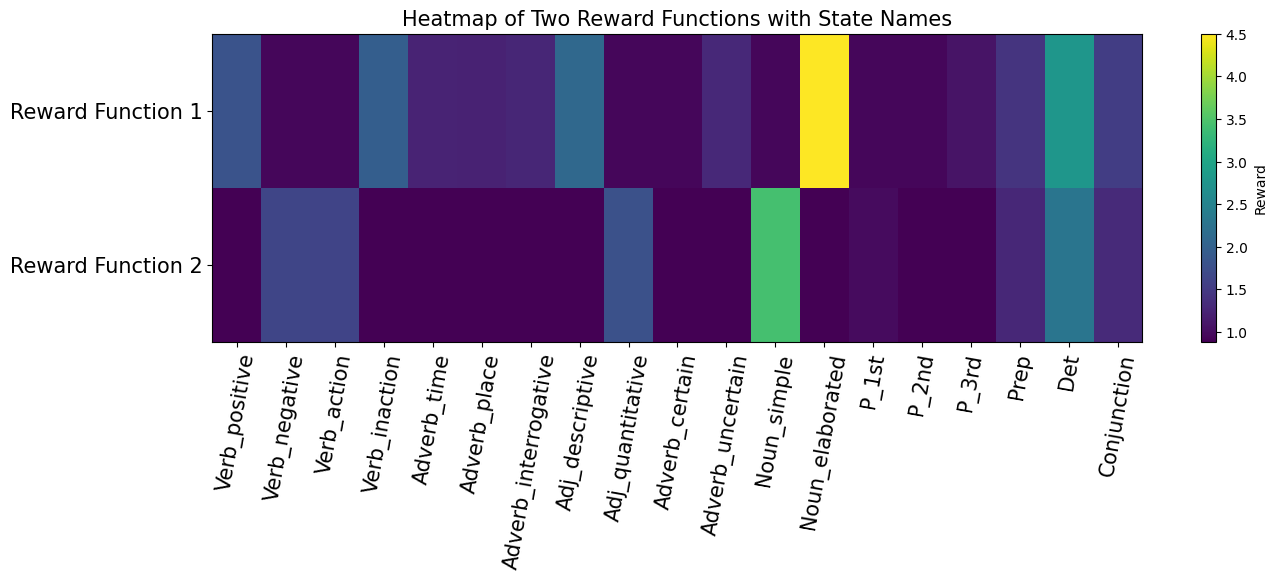

In [ ]:
import matplotlib.pyplot as plt

fig

size_text = 15


# Example list of state names (replace with your actual list of state names)
state_names = states

rewards = np.array([reward_maxent_pos, reward_maxent_neg])


# Creating the heatmap
plt.figure(figsize=(15, 4))  # Adjusted figure size for better readability
plt.imshow(rewards, cmap='viridis', aspect='auto')
plt.colorbar(label='Reward')

# Adding labels and title
plt.title('Heatmap of Two Reward Functions with State Names', fontsize = size_text)
# plt.xlabel('States', fontsize = size_text)
# plt.ylabel('Reward Function', fontsize = size_text)
plt.yticks([0, 1], ['Reward Function 1', 'Reward Function 2'], fontsize = size_text)
plt.xticks(np.arange(19), labels=state_names, rotation=80, fontsize = size_text)  # Rotate for readability

plt.show()



In [ ]:
from google.colab import files
files.download('my_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Corresponding states of the reward function
state_number_dic

{'Verb_positive': 0,
 'Verb_negative': 1,
 'Verb_action': 2,
 'Verb_inaction': 3,
 'Adverb_time': 4,
 'Adverb_place': 5,
 'Adverb_interrogative': 6,
 'Adj_descriptive': 7,
 'Adj_quantitative': 8,
 'Adverb_certain': 9,
 'Adverb_uncertain': 10,
 'Noun_simple': 11,
 'Noun_elaborated': 12,
 'P_1st': 13,
 'P_2nd': 14,
 'P_3rd': 15,
 'Prep': 16,
 'Det': 17,
 'Conjunction': 18}

In [ ]:
#

# Keep playing with those two cells to generate any sentence according to the CFG

In [1]:
from typing import Dict, List, Union
import random

class CFG_1:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:
        if symbol in self.rules:


            production = random.choice(self.rules[symbol])
            return ' '.join(self.generate(sym) for sym in production).capitalize()
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol




class CFG_2:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:
        if symbol in self.rules:


            production = random.choice(self.rules[symbol])
            return ' '.join(self.generate(sym) for sym in production).capitalize()
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol




cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    "Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}


cfg_rules_positive = {
   "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"]],
    "Ponctuation": [ ["Ponct_e"]],

    "Adj": [["Adj_descriptive"]],
    "Pronoun": [["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ['Adverb_uncertain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]
}



cfg_rules_negative = {

  "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Ponctuation": [ ["Ponct_n"]],
    "Noun": [ ["Noun_harsh"]],
    "Adj": [ ["Adj_quantitative"]],
    "Pronoun": [["P_1st"]],
    "Verb": [["Verb_negative"], ["Verb_action"]],
    # "Adverb": [["Adverb_time"], ["Adverb_place"], ['Adverb_certain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]

}




cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence



cfg = CFG_1(cfg_rules_positive, terminal_words)


pos_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)


cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)






In [2]:
cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    "Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}


cfg_rules_positive = {
   "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"]],
    "Ponctuation": [ ["Ponct_e"]],

    "Adj": [["Adj_descriptive"]],
    "Pronoun": [["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ['Adverb_uncertain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]
}



cfg_rules_negative = {

  "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Ponctuation": [ ["Ponct_n"]],
    "Noun": [ ["Noun_harsh"]],
    "Adj": [ ["Adj_quantitative"]],
    "Pronoun": [["P_1st"]],
    "Verb": [["Verb_negative"], ["Verb_action"]],
    # "Adverb": [["Adverb_time"], ["Adverb_place"], ['Adverb_certain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]

}







In [3]:
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence


'Car hovers but your grab under those radiant harmony somewhere .'

In [6]:
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence



cfg = CFG_1(cfg_rules_positive, terminal_words)


pos_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)


cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)



In [7]:
pos_sentences

['Journey hovers eventually as discovery illuminate possibly without the bright serenity everywhere !',
 'The adventure rest these quest eventually !',
 'An harmony rest pensively a quest for those odysseys thrive this serenity presumably !',
 'An odyssey pause somewhere because an radiant serenity illuminates that peaceful adventure shortly ?',
 'Odysseys pause in those discovery likely because hers laze pensively this calm discovery !',
 'An oasis rest on those colorful beacon ?',
 'An adventure illuminate a adventure presumably ?',
 'Discovery hovers wonderingly that radiant serenity gradually ?',
 'Quest illuminate doubtfully that quest wonderingly !',
 'An bright odyssey soar those discovery wonderingly and the radiant serenity hovers !',
 'Jubilee rest with these bright serenity or this odyssey bask suddenly ?',
 'Odyssey bloom in an adventure ?',
 'Adventure soars maybe an peaceful adventure doubtfully and an journey rest !',
 'A calm journey thrive ?',
 'Him illuminates gradual

In [8]:
cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)


In [9]:
neg_sentences

['Accident smash adverb under those damage adverb .',
 'That car grab adverb these car .',
 'An phone grab .',
 'Ours complain but our push adverb that few phone .',
 'Blight push adverb .',
 'A much blight complain adverb these job adverb so these money complain adverb these discord adverb .',
 'This pain snarl in a house .',
 'A phone push adverb a many job adverb .',
 'A phone grab adverb without that car adverb .',
 'The many pain storm adverb in these job adverb since pain complain adverb these pain .',
 'An some damage storm .',
 'A few discord storm .',
 'This little job blame adverb under an many discord adverb so that little car storm .',
 'Mine complain adverb .',
 'Us shout but our grumble under this phone adverb .',
 'The accident grumble adverb in an job adverb as the some damage shout under a blight .',
 'An many house grumble adverb under the few discord but house push a little damage adverb .',
 'That phone grumble adverb those some blight adverb .',
 'I shout with thes

In [ ]:
def generate_actions(cfg_rules, word_class):

    actions = set()

    occurrences = []
    for key, rules in cfg_rules.items():
        for rule in rules:
            if word_class in rule:
                occurrences.append((key, rule))

    for key, rule in occurrences:
        index = rule.index(word_class)
        if index + 1 < len(rule):
            next_symbol = rule[index + 1]
            actions = actions.union(traverse_down(cfg_rules, next_symbol))
        else:
            up_symbols = traverse_up(cfg_rules, key)
            for s in up_symbols:
                actions = actions.union(traverse_down(cfg_rules, s))

    return actions




def traverse_down(cfg_rules, s):
    """
    Traverse down in the CFG from a given symbol and collect terminal symbols.
    """
    S_star = set()

    def recursive_traverse_down(s_prime, S_star):
        if s_prime in terminal_symbols:
            S_star.add(s_prime)
        else:
            for rule in cfg_rules.get(s_prime, []):
                if rule:
                    first_symbol = rule[0]
                    recursive_traverse_down(first_symbol, S_star)

    recursive_traverse_down(s, S_star)
    return S_star





def traverse_up(cfg_rules, s):
    """
    Traverse up in the CFG from a given symbol and collect symbols that can follow it.
    """
    S_star = set()

    def recursive_traverse_up(s_prime, S_star):
        found_next = False
        for key, rules in cfg_rules.items():
            for rule in rules:
                if s_prime in rule:
                    index = rule.index(s_prime)
                    if index + 1 < len(rule):
                        S_star.add(rule[index + 1])
                        found_next = True

        if not found_next:
            for key, rules in cfg_rules.items():
                for rule in rules:
                    if s_prime in rule:
                        s_l = key
                        instances = [r for r in rules if s_l in r]
                        if not instances:
                            S_star.add("<EOS>")
                        else:
                            for instance in instances:
                                recursive_traverse_up(s_l, S_star)

    recursive_traverse_up(s, S_star)
    return S_star

def traverse_up(cfg_rules, s):
    """
    Traverse up in the CFG from a given symbol and collect symbols that can follow it.
    """
    S_star = set()

    def recursive_traverse_up(s_prime, S_star, visited):
        if s_prime in visited:
            return
        visited.add(s_prime)

        for key, rules in cfg_rules.items():
            for rule in rules:
                if s_prime in rule:
                    index = rule.index(s_prime)
                    if index + 1 < len(rule):
                        S_star.add(rule[index + 1])
                    else:
                        # Traverse to the left-hand side symbol of this rule
                        recursive_traverse_up(key, S_star, visited)

    recursive_traverse_up(s, S_star, set())
    if not S_star:
        S_star.add("<EOS>")  # Add <EOS> if no symbols are found
    return S_star

# Test the revised traverse_up function
# traverse_up(cfg_rules_non_enriched, 'Verb')




cfg_rules_non_enriched = {
    "Sentence":  [["Simple"], ["Compound"]],
    "Compound" : [["Simple", "Conjunction", "Simple"]],
    "Simple" : [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],
    "Sub" : [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP" : [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ]
}

terminal_symbols = ["Prep", "Det", "Adj", "Noun", "Conjunction", "Verb", "Adverb", "Pronoun"]

generate_actions(cfg_rules_non_enriched, 'Verb')

{'Adverb', 'Conjunction', 'Det', 'Prep'}

In [ ]:
def get_terminal_options(mappings, non_terminal):

    return [option for sublist in mappings.get(non_terminal, []) for option in sublist]

def get_non_terminal(mappings, terminal):

    mappings = {
    "Noun": [["Noun_simple"], ["Noun_elaborated"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"]],
    "Conjunction": [["Conjunction_certain"], ["Conjunction_uncertain"], ["Conjunction_explanatory"]],
    "Det": [["Det"]],
    "Prep": [['Prep']]

}


    for non_terminal, options in mappings.items():
        if any(terminal in sublist for sublist in options):
            return non_terminal
    return None



print(get_terminal_options(mappings, 'Adverb'))
print(get_non_terminal(mappings, 'Verb_negative'))



['Adverb_time', 'Adverb_place', 'Adverb_interrogative']
Verb


In [ ]:
for state in states:
  non_terminal_state= get_non_terminal(mappings, state)
  print(non_terminal_state, generate_actions(cfg_rules_non_enriched, non_terminal_state))


Verb {'Det', 'Adverb', 'Prep'}
Verb {'Det', 'Adverb', 'Prep'}
Verb {'Det', 'Adverb', 'Prep'}
Verb {'Det', 'Adverb', 'Prep'}
Adverb {'Det', 'Conjunction', 'Prep'}
Adverb {'Det', 'Conjunction', 'Prep'}
Adverb {'Det', 'Conjunction', 'Prep'}
Adj {'Noun'}
Adj {'Noun'}
None set()
None set()
Noun {'Verb', 'Adverb'}
Noun {'Verb', 'Adverb'}
Pronoun {'Verb'}
Pronoun {'Verb'}
Pronoun {'Verb'}
Prep {'Det'}
Det {'Noun', 'Adj'}
None set()


In [ ]:
states

['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Conjunction_certain',
 'Conjunction_uncertain',
 'Conjunction_explanatory',
 'Noun_simple',
 'Noun_elaborated',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det']

In [ ]:
stop here

SyntaxError: ignored

# STOP HERE OLD CODE !!!!!!

# STOP HERE OLD CODE !!!!!!

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Corpus provided by the user
corpus = ['I love basketball',
          'I love football',
          'I love soccer',
          'I love tennis',
          'I love volleyball',
          'I love cake',
          'I love cookies',
          'I love pizza',
          'I love chocolate',
          'I love candies',
          ]

corpus_1 = ['I love basketball',
          'I love football',
          'I love soccer',
          'I love tennis',
          'I love volleyball',]

corpus_2 = ['I love cake',
          'I love cookies',
          'I love pizza',
          'I love chocolate',
          'I love candies',
          ]





In [ ]:
# Tokenize the sentences and create a set of unique words
unique_words = set(word for sentence in corpus for word in sentence.split())

# Sort the unique words to have consistent order
sorted_unique_words = sorted(list(unique_words))

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape and fit transform the sorted unique words
one_hot_encoded = encoder.fit_transform(np.array(sorted_unique_words).reshape(-1, 1))

# Map each unique word to its one-hot encoded vector
word_to_one_hot = dict(zip(sorted_unique_words, one_hot_encoded))

# Display the one-hot encoded vectors
for word, one_hot_vector in word_to_one_hot.items():
    print(f"Word: {word}, One-hot vector: {one_hot_vector}")




In [ ]:
one_hot_encoded

In [ ]:
word_to_one_hot

In [ ]:
# Initialize the 3D matrix of zeros
transition = np.zeros((12, 12, 12))

# Iterate through the second dimension to set the ith column to ones
for i in range(12):
    transition[:, i, i] = 1



In [ ]:
D1 = []


for sentence  in corpus_1:
  episode = []
  sentence = sentence.split()
  for i in range(len(sentence) - 1):

    s = np.argmax(word_to_one_hot[sentence[i]])
    s_next = np.argmax(word_to_one_hot[sentence[i + 1]])
    episode.append((s, s_next, s_next))

  D1.append(T.Trajectory(episode))

In [ ]:
one_hot_encoded

In [ ]:
D1

In [ ]:
terminal1 = []

for traj in D1:
  terminal1.append(traj._t[-1][-1])

terminal1 = list(set(terminal1))

In [ ]:
terminal1

In [ ]:
#   initialize parameters with constant
init = O.Constant(1.0)

# choose our optimization strategy:
#   we select exponentiated stochastic gradient descent with linear learning-rate decay
optim = O.ExpSga(lr=O.linear_decay(lr0=0.2))

# Computing the R function through inverse reinforcement learning
reward_maxent1 = irl(transition, one_hot_encoded, terminal1, D1, optim, init)

In [ ]:
reward_maxent1

In [ ]:
word_to_one_hot

In [ ]:
D2 = []


for sentence  in corpus_2:
  episode = []
  sentence = sentence.split()
  for i in range(len(sentence) - 1):

    s = np.argmax(word_to_one_hot[sentence[i]])
    s_next = np.argmax(word_to_one_hot[sentence[i + 1]])
    episode.append((s, s_next, s_next))

  D2.append(T.Trajectory(episode))

In [ ]:
terminal2 = []

for traj in D2:
  terminal2.append(traj._t[-1][-1])

terminal2 = list(set(terminal2))

In [ ]:
#   initialize parameters with constant
init = O.Constant(1.0)

# choose our optimization strategy:
#   we select exponentiated stochastic gradient descent with linear learning-rate decay
optim = O.ExpSga(lr=O.linear_decay(lr0=0.2))

# Computing the R function through inverse reinforcement learning
reward_maxent2 = irl(transition, one_hot_encoded, terminal2, D2, optim, init)

In [ ]:
reward_maxent2

In [ ]:
word_to_one_hot